## Machine Learning A-Z™: Hands-On Python & R In Data Science

### Kirill Eremenko, Hadelin de Ponteves, SuperDataScience Team

https://www.udemy.com/machinelearning/

Part 2: Data Preprocessing Template

**Section 9: Random Forest Regression**

Scenario: 
- Company wants to hire new candidate and needs to predict salary based on level of position
- Candidate said his previous salary was 160K
- Predict if candidate statement this is true

---
- Random Forest is a version of ensemble learning
- Random forest is an /ensemble of decision trees
- here we are predicting on 'forest' of trees
- example of ensemble method: guess the number of marbles in a jar
- strategy: ask the number that people who guessed
- average it out and remove the outliers
---


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [12]:
#let's take a look at the dataset
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [13]:
# Splitting the dataset into the Training set and Test set - NO NEED, data is too small
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling- NO NEED
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [14]:
# Fitting the Random Forest Regression Model to the dataset
## choose the number of trees to be used to build model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 10, random_state= 0)
regressor.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

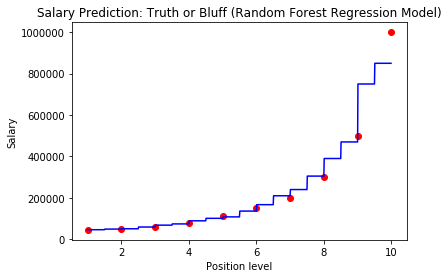

In [4]:
# Visualizing the Random Forest Regression results 
# (for higher resolution and smoother curve)
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Salary Prediction: Truth or Bluff (Random Forest Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**Observation:**

We get more steps in the stairs, with more trees. The more trees, the more the average converge to the 'ultimate average'

With 1 tree: Decision tree: we got 150K // What about with 10 trees = Random Forest?
___

In [15]:
# Predicting previous salary of future employee
y_pred = regressor.predict([[6.5]])
print(y_pred)

[167000.]


**Answer:** 167K quite close!
___

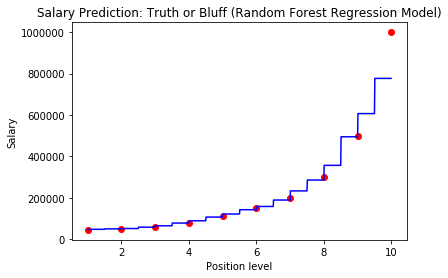

In [16]:
## let's try with 100 trees
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 100, random_state= 0)
regressor.fit(x,y)

# Visualising the Random Forest Regression results 
# (for higher resolution and smoother curve)
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Salary Prediction: Truth or Bluff (Random Forest Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [17]:
# Predicting previous salary of future employee
y_pred = regressor.predict([[6.5]])
print(y_pred)
## answer: 

[158300.]


**Answer:** 158K very close! Let's try 300 trees
___

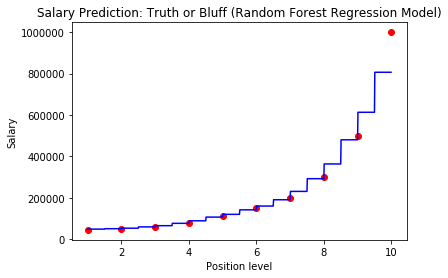

In [18]:
## let's try 300 trees
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 300, random_state= 0)
regressor.fit(x,y)

# Visualising the Random Forest Regression results 
# (for higher resolution and smoother curve)
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Salary Prediction: Truth or Bluff (Random Forest Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [19]:
#predict the salary with 300 trees
y_pred = regressor.predict([[6.5]])
print(y_pred)

[160333.33333333]


**Answer:** 160.3333K. Awesome, we got it right!

---
Overall note:  the more trees in the random forest, the  more accurate our prediction will be
